In [9]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.metrics import confusion_matrix

In [10]:
# Készíts egy függvényt ami betölti a digits datasetet 
# NOTE: használd az sklearn load_digits-et
# Függvény neve: load_digits()
# Függvény visszatérési értéke: a load_digits visszatérési értéke
from sklearn.datasets import load_digits

def Load_digits():
    digits = load_digits()
    return digits

In [11]:
# Vizsgáld meg a betöltött adatszetet (milyen elemek vannak benne stb.)
digits = Load_digits()

print(digits.keys())
print(digits.data.shape)
print(digits.target.shape)


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 64)
(1797,)


In [12]:
# Vizsgáld meg a data paraméterét a digits dataset-nek (tartalom,shape...)
print(digits.data)
print(digits.data.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)


In [13]:
# Készíts egy függvényt ami létrehoz egy KMeans model-t 10 db cluster-el
# NOTE: használd az sklearn Kmeans model-jét (random_state legyen 0)
# Miután megvan a model predict-elj vele 
# NOTE: használd a fit_predict-et
# Függvény neve: predict(n_clusters:int,random_state:int,digits)
# Függvény visszatérési értéke: (model:sklearn.cluster.KMeans,clusters:np.ndarray)


def predict(n_clusters: int, digits) -> (KMeans, np.ndarray):
    model = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = model.fit_predict(digits.data)

    return model, clusters


In [19]:
# Vizsgáld meg a shape-jét a kapott model cluster_centers_ paraméterének.
model, clusters = predict(10, digits)

print(model.cluster_centers_.shape)


(10, 64)


c:\Users\kutte_z7h843e\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


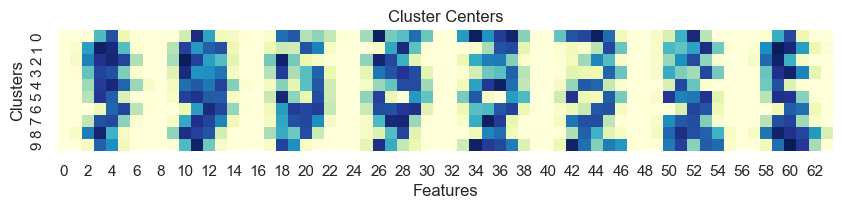

In [20]:
# Készíts egy plotot ami a cluster középpontokat megjeleníti
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(model.cluster_centers_, ax=ax, cmap='YlGnBu', square=True, cbar=False)
ax.set_title('Cluster Centers')
ax.set_xlabel('Features')
ax.set_ylabel('Clusters')
plt.show()

In [21]:
# Készíts egy függvényt ami visszaadja a predictált cluster osztályokat
# NOTE: amit a predict-ből visszakaptunk "clusters" azok lesznek a predictált cluster osztályok
# HELP: amit a model predictált cluster osztályok még nem a labelek, hanem csak random cluster osztályok, 
#       Hogy label legyen belőlük:
#       1. készíts egy result array-t ami ugyan annyi elemű mint a predictált cluster array
#       2. menj végig mindegyik cluster osztályon (0,1....9)
#       3. készíts egy maszkot ami az adott cluster osztályba tartozó elemeket adja vissza
#       4. a digits.target-jét indexeld meg ezzel a maszkkal
#       5. számold ki ennel a subarray-nek a móduszát
#       6. a result array-ben tedd egyenlővé a módusszal azokat az indexeket ahol a maszk True 
#       Erre azért van szükség mert semmi nem biztosítja nekünk azt, hogy a "0" cluster a "0" label lesz, lehet, hogy az "5" label lenne az.

# Függvény neve: get_labels(clusters:np.ndarray, digits)
# Függvény visszatérési értéke: labels:np.ndarray

def get_labels(clusters:np.ndarray, digits):
    result = np.zeros_like(clusters)
    for cluster in range(10):
        mask = (clusters == cluster)
        subarr = digits.target[mask]
        mode = np.bincount(subarr).argmax()
        result[mask] = mode
    return result


In [22]:
# Készíts egy függvényt ami kiszámolja a model accuracy-jét
# Függvény neve: calc_accuracy(target_labels:np.ndarray,predicted_labels:np.ndarray)
# Függvény visszatérési értéke: accuracy:float
# NOTE: Kerekítsd 2 tizedes jegyre az accuracy-t
def calc_accuracy(target_labels:np.ndarray, predicted_labels:np.ndarray):
    return round(np.mean(target_labels == predicted_labels), 2)


<AxesSubplot:>

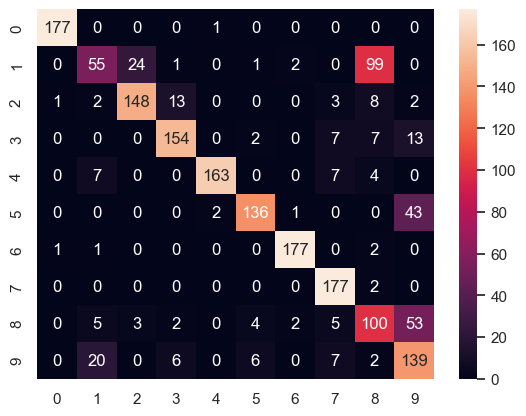

In [23]:
# Készíts egy confusion mátrixot és plot-old seaborn segítségével

## elmentjük a valós és prediktált értékeket
true_labels = digits.target
predicted_labels = get_labels(clusters, digits)

# confusion matrix kiszámolása
cm = confusion_matrix(true_labels, predicted_labels)

# plot
sns.heatmap(cm, annot=True, fmt='g')